##### <font color="C13F38"><strong>This homework is due at midnight on March 10, 2023. </strong></font>

As before: run the cell below to get you started.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import minimize

# Lab 2A - Reinforcement Learning

In this lab, you are going to code up a simple reinforcement learning agent that learns about and decides between two choices that have a probability to produce reward. Next, you will investigate how the different parameters of this model affect behavior. In the second part of this lab, you will simulate behavior of the model on an experiment that investigates the effect of reward *volatility* on learning and decision making in this task. You will simulate behavior on this task to see how an agent *should* change its behavior in response to volatility. Finally, you will fit models to data from human participants that completed this task, and then perform model comparison, to see how they actually did. You can earn 64 points on this assignment. Your grade will be the percentage of points you earn.

_Credits_  
This lab is inspired by a series of lab exercises designed by Laurence Hunt, Nils Kolling, Miriam Klein-Flügge, and Jacqueline Scholl. I am grateful for them making their materials available online and promise to pay it forward.

# 1. Learning in volatile and stable environments

Imagine that you go to a local casino (note: I don't endorse going to one) and you approach the shiniest looking slot machine, also known as a one-armed bandit. How would you determine the reward probability of the machine -- the chance that playing the machine gives you a reward? As you learned in class, animals (including humans) estimate the value of choice through *error correction* and *reinforcement learning*. Specifically, the RL framework proposes that animals update their estimate of how much reward something will provide by contrasting what they expected with what they observed. This difference is called the prediction error ($\delta$). On a given trial $t$, this signal is given by

$\delta_t = r_t - V_t$,

where $\delta_t$ is the prediction error on trial $t$, $r_t$ is the reward on that trial, and $V_t$ is the estimate of how much reward was expected on that trial.

We then use this prediction error to update the expectation of receiving reward from that option in the future,

$V_{t+1} = V_t + \alpha \delta_t$,

where $\alpha$ is the ‘learning rate’. This parameter, of which the value has to be $0 < \alpha \le 1$, dictates to which degree the prediction error gets use to update 𝑉. In other words, it sets the speed at which the reinforcement-learning agent learns from the previous experience.

Let’s build a function that simulates a reinforcement learning agent estimating the probability of a single option, and then play around with some of its parameters to try to understand its workings.


<font color="508C46"><strong>Question 1.1 (5 points)</strong> <br>
Complete the function below. It should implement a reinforcement-learning model. This function should have three input parameters: the actual reward probability, the learning rate, and the number of trials. The function should `return` a vector with the estimated reward probability on each trial. Here is some code to get you started:
</u></b></font>

In [2]:
def RL_function(fixedRewardProb, alpha, nrtrials): # remember to change the function name
    v = np.zeros(nrtrials+1)
    v[0] = 0.5 # initial value

    for i in range((nrtrials)): 
        r = int(np.random.rand() < fixedRewardProb)
        delta = r-v[i]
        v[i+1] = v[i]+alpha*delta

    return v

<font color="508C46">Test your code, and make sure it works appropriately. Tip: run this function with at least 200 trials and choose a reasonable learning rate, and use `plt.plot(values)` to inspect the behavior of your model. **What do you notice?** Sometimes `v` goes up from one trial to the next, on other trials it goes down. **What happened on trials where `v` went up? What happened on trials where `v` went down? How do you know?**</b></font>

(0.0, 1.0)

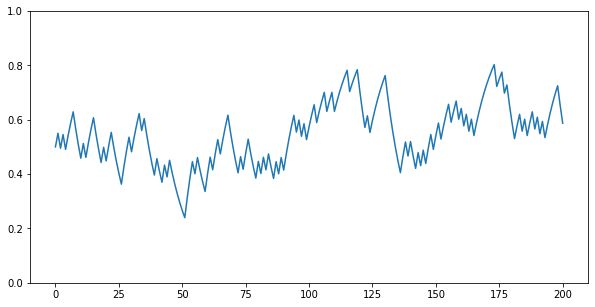

In [3]:
plt.figure(figsize=(10,5))
result=RL_function(.5,.1,200)
plt.plot(result)
plt.ylim(0,1)


.. double click this to write your response here

I notice that the reward probabilities across the 200 trials are roughly within .2 and .8, but spend the most time at around .5, which is the true reward probability. On trials when v went up, the previous trial was a reward. This would make delta positive which means that a positive value is added to the current expected reward, increasing v+1. However, on trials where v goes down, the previous trial did not receive a reward, making delta negative and causing the previous expectation of reward to decrease.


<font color="508C46"><strong>Question 1.2 (3 points)</strong> <br>
Now, play around with the learning rate `alpha` and `fixedRewardProb`, and observe their effect on `v`. Specifically, try to understand the effect of the learning rate on `v`. You can call plt.plot() a few times to show these graphs together. **What are the advantages of having a high learning rate? What are the advantages of having a low learning rate? What happens when the learning rate is 1?**
</u></b></font>

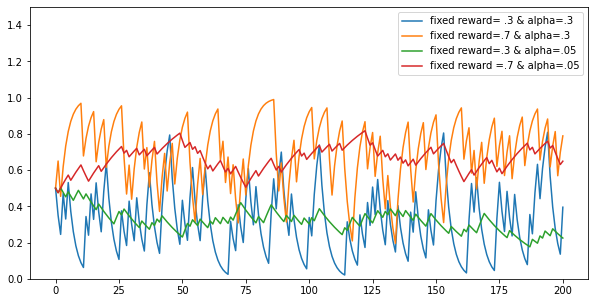

In [4]:
# your code here
plt.figure(figsize=(10,5))
v1=RL_function(.3,.3,200)
v2=RL_function(.7,.3,200)
v3=RL_function(.3,.05,200)
v4=RL_function(.7,.05,200)
#Vlearningrate1=RL_function(.5,1,200)

plt.plot(v1)
plt.plot(v2)
plt.plot(v3)
plt.plot(v4)
#plt.plot(Vlearningrate1)
plt.ylim(0,1.5)
plt.legend( ['fixed reward= .3 & alpha=.3 ', 'fixed reward=.7 & alpha=.3', 'fixed reward=.3 & alpha=.05', 'fixed reward =.7 & alpha=.05']);


.. double click this to write your response here

When alpha is low, the function is less sensitive to winning and losing, so there is less volatility or difference between Vs, and is pretty centered around the actual reward probability. Conversley, a high learning rate yields more extreme peaks and valleys, as seen in the orange and blue graphs, and makes it harder to tell just from the graph what the learning rate is, because it is sensitive to wins and losses. When the learning rate is 1, the graph oscilates between 0 and 1 becauses when the previous trial is a reward, the model expects the next trial to be a reward with probability one, and zero when the previous trial was not a reward with probability 1


In most interesting psychological tasks, or real-life scenarios, how good a particular option is changes over time. So, let’s try to add some *volatility* to the reward probability that our reinforcement learning model is trying to estimate.

We are going to do this by letting the reward probability switch every 25 trials from $p$ to $1 − p$. So, if the reward probability is 80% for the first 25 trials, then it will become 20% on the next 25 trials, and then switch back to 80% for the following 25 trials, and so forth.

To do so we are going to copy the code from Question 1.1 to a new function and change it a bit. Now, instead of supplying it with a `fixedRewardProb` value and a `nrtrials`, let’s supply the function with a vector of reward probabilities, one for each trial. We are going to do this using the function `np.ones()`. To understand this function, let’s test it out a bit:

In [5]:
np.ones((2,10))

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

So, `np.ones((a,b))` makes a matrix filled with `a` rows and `b` columns (the double parentheses are necessary to make this work). Now enter `3* np.ones((10,2))` in the next cell, try to predict the result of the code before you run it and then verify you were right (If you were wrong, make sure you understand why.)

In [6]:
# you can play with np.ones() here
3* np.ones((10,2))

array([[3., 3.],
       [3., 3.],
       [3., 3.],
       [3., 3.],
       [3., 3.],
       [3., 3.],
       [3., 3.],
       [3., 3.],
       [3., 3.],
       [3., 3.]])

Now that you understand `np.ones` we can start making a vector with reward probabilities to create a more volatile task environment. Remember (from earlier on this page), we want the first 25 trials to have a certain reward probability $p$ (say 80%) and then the next 25 trials to have the reward probability be $1 − p$. One way to do this is to string together calls of `0.8*np.ones((25))` and `0.2*np.ones((25))`, repeatedly, this can be accomplished as follows:

In [7]:
rewardProbabilities = np.concatenate((0.8*np.ones((25)), 0.2*np.ones((25))))

We can now use `np.tile(rewardProbabilities,2)` to create a new variable called `volatileRewardProbabilities` which has _four_ blocks of 25 trials each, where the reward probabilities switch from 80% and 20%:

In [8]:
volatileRewardProbabilities = np.tile(rewardProbabilities,2)
volatileRewardProbabilities

array([0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8,
       0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.8, 0.8,
       0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8,
       0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2])

<font color="508C46"><strong>Question 1.3 (3 points)</strong> <br>
In the cell below, copy the code from Question 1.1 into a new *function* (with a sensible name), and adapt it so that it takes a vector of `rewardProbabilities`, and not a `fixedRewardProb` and a `nrtrials` (of course it will still need an `alpha`). Note that this means that you have to calculate the `nrtrials` in this new function. You can do so by using `len()`. Run your code with the `volatileRewardProbabilities` computed above. Test your code by plotting the rewards along with the actual reward probabilities (using `plt.plot(values)`). The estimated values should track the true (volatile) reward probabilities.
</u></b></font>

In [9]:
# your code here
def RL_function_volatility(RewardProbVector, alpha): # remember to change the function name
    nrtrials= len(RewardProbVector)
    v = np.zeros(nrtrials+1)
    v[0] = 0.5 # initial value
    
    for i in range((nrtrials)): 
        r = int(np.random.rand() < RewardProbVector[i])
        delta = r-v[i]
        v[i+1] = v[i]+alpha*delta

    return v

(0.0, 1.0)

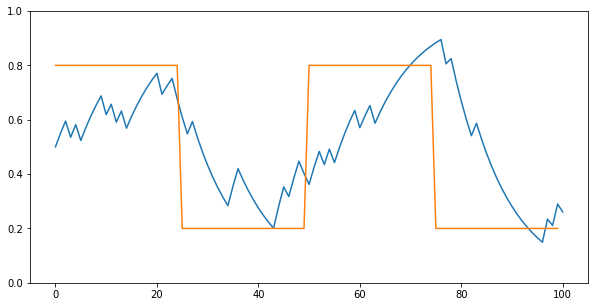

In [10]:
plt.figure(figsize=(10,5))
plt.plot(RL_function_volatility(volatileRewardProbabilities, .1))
plt.plot(volatileRewardProbabilities)
plt.ylim(0,1)

As a final exercise in this section, let’s investigate whether the optimal learning rate depends on the volatility of the task environment. (Of course, the optimal learning rate is the one that minimizes the predictiom error.)

To do so, we are going to perform an analysis that looks a little bit like grid search, running the reinforcement-learning model with different learning rates on less and more volatile reward probabilities. Then, we’ll compute the average difference between the estimated and the true reward probabilities for each of these agents. By plotting this difference as a function of the learning rate, we will be able to figure out which learning rates lead to the best estimates (those that produce the lowest difference between the true and estimated probabilities).

To do this, we first need a vector of `stableRewardProbabilities` where the reward probabilities don’t change:

In [11]:
stableRewardProbabilities = 0.75 * np.ones(100) # inspect this variable. Note that these are simply 100 trials with a reward probability of 75%.

As a measure of accuracy of the reinforcement learning model, we are going to calculate the difference between the estimated reward probability (`v`) and the true reward probability on each trial (`stableRewardProbabilities` and `volatileRewardProbabilities`). For each learning rate, we are going to do this for both the stable and volatile reward probability conditions.

To start, let’s compute this difference for a single agent with one learning rate ($\alpha = 0.1$), and one set of reward probabilities (say `volatileRewardProbabilities`). Use the function from Question 1.3 to compute a vector of estimated reward probabilities for the volatile condition for this agent (this should be the output from your function). I’m going to assume you called this variable `v`.

The difference between the true and estimated reward probabilities is relatively simple to compute. Essentially, we want to take the difference between `v` and `volatileRewardProbabilities`, or `v-volatileRewardProbabilities`. However, if you try this command, you’ll notice that python reports an error:

In [13]:
v = RL_function_volatility(volatileRewardProbabilities, .1)
#v-volatileRewardProbabilities

```python
ValueError: operands could not be broadcast together with shapes (101,) (100,) 
```
This is because `v` has length 101, but `volatileRewardProbabilities` has length 100 (check this!). What’s happening here is that the actual estimates of the reward probabilities for trials 1 through 100 are stored in indices 2 through 101, and the first element in `v` is simply the initial value. So, the difference between the estimated and true reward probabilities can be computed as:

In [14]:
difference = v[1:] - volatileRewardProbabilities
difference

array([-0.25      , -0.205     , -0.1645    , -0.12805   , -0.095245  ,
       -0.0657205 , -0.03914845, -0.01523361,  0.00628976,  0.02566078,
        0.0430947 ,  0.05878523, -0.02709329, -0.10438396, -0.07394557,
       -0.14655101, -0.21189591, -0.27070632, -0.22363569, -0.28127212,
       -0.33314491, -0.37983042, -0.32184737, -0.26966264, -0.22269637,
        0.31957326,  0.26761594,  0.22085434,  0.27876891,  0.23089202,
        0.18780282,  0.14902254,  0.21412028,  0.17270825,  0.13543743,
        0.10189369,  0.17170432,  0.13453389,  0.1010805 ,  0.07097245,
        0.0438752 ,  0.11948768,  0.08753891,  0.05878502,  0.03290652,
        0.00961587, -0.01134572, -0.03021115, -0.04719003, -0.06247103,
       -0.57622393, -0.49860153, -0.42874138, -0.36586724, -0.30928052,
       -0.25835247, -0.21251722, -0.2712655 , -0.22413895, -0.18172505,
       -0.14355255, -0.20919729, -0.16827756, -0.13144981, -0.09830483,
       -0.06847434, -0.04162691, -0.11746422, -0.0857178 , -0.05

If you enter this command, you will see that the difference between the true and estimated reward probabilities is sometimes negative and sometimes positive. Like in the linear regression example from the first model-fitting lecture, we are not actually interested in the sign of the difference, since negative and positive difference count the same, so let’s take the absolute value of this difference:

In [15]:
difference = abs(v[1:] - volatileRewardProbabilities)

If you make this change to the line of code to the cell above, you’ll see that this vector now only has positive values. Finally, we want to distill this vector of difference into a single value, so that we can compare performance of one agent again that of another. Let’s do this using the average difference:

In [16]:
difference = np.mean(abs(v[1:] - volatileRewardProbabilities))

We are almost there. Let’s compute this value for 100 different learning rates, ranging from 0 to 1. This means we are going to run the model 100 times, each time with a different learning rate, storing the average difference between `v` and `volatileRewardProbabilities` for each simulation.

First, let’s set up the 100 different learning rates that we want to use:

In [17]:
alphas = np.linspace(0, 1, 100) # inspect the variable alphas

Inspect this variable, and make sure you understand what happened when we called `np.linspace`. (we have used it in Lab 1 as well). Now, we are going to use for loops, run the reinforcement learning model for each learning rate, and compute the difference the true and estimated reward probabilities.

<font color="508C46"><strong>Question 1.4 (5 points)</strong> <br>
Let’s get to it. **Compute the difference between the true (`volatileRewardProbabilities`) and estimated reward probabilities for a series of reinforcement learning agents with learning rates ranging from 1 to 100**. Because the estimated reward probabilities we are going to get are a bit noisy, we will repeat this 1000 times for each learning rate and then take their average. (Note this block might take a little bit) Here is some code to get you going:
</u></b></font>

In [18]:
difference = np.zeros((len(alphas), 1000))
avgs=np.zeros(len(alphas))
for i,alpha in enumerate(alphas):
    for j in range(1000):
     v= RL_function_volatility(volatileRewardProbabilities, alphas[i])
     difference[i,j]=np.average(abs(v[1:]-volatileRewardProbabilities))
    avgs[i]=np.average(difference[i]) 
        #difference[i,j] = 
difference
avgs

array([0.3       , 0.29385996, 0.28311093, 0.26901475, 0.25504339,
       0.23939937, 0.22312737, 0.20966539, 0.19826638, 0.18696697,
       0.17744234, 0.1708259 , 0.16528477, 0.15981399, 0.1570631 ,
       0.15391792, 0.15227401, 0.14880057, 0.1472899 , 0.14706418,
       0.14711408, 0.14724139, 0.14722102, 0.14836561, 0.14814966,
       0.14952872, 0.15119034, 0.15207164, 0.1533579 , 0.15433302,
       0.15610893, 0.15731051, 0.15895377, 0.16100074, 0.16244014,
       0.16445039, 0.16711909, 0.16784706, 0.16979652, 0.17247887,
       0.17416611, 0.17676346, 0.17877267, 0.1803206 , 0.18300294,
       0.18521436, 0.18637847, 0.18966077, 0.19024238, 0.19286135,
       0.19431467, 0.19630808, 0.1981615 , 0.20068047, 0.20202342,
       0.20498949, 0.20691377, 0.20960049, 0.21064424, 0.21353349,
       0.2147716 , 0.21708321, 0.21832679, 0.22032751, 0.22282189,
       0.2249253 , 0.22584414, 0.2278121 , 0.22885703, 0.23042359,
       0.23216793, 0.23344375, 0.23536367, 0.23693721, 0.23977

<font color="508C46">This way, we store the difference for each iteration and each learning rate. After running the code, you can plot the average difference for each learning rate by using `plt.plot`. Think about how you want to average the resuts in `difference`. How many values should you get? **What is the value for the optimal learning rate? Explain.**</font>

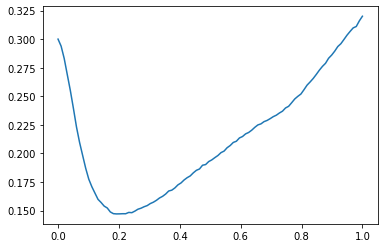

In [19]:
plt.plot(alphas, avgs)

In [20]:
# your code here
learningrate_volatile=alphas[np.argmin(avgs)]
learningrate_volatile

0.19191919191919193


.. double click this to write your response here
 
The optimal learning rate is .21, which can be seen in the graph because the lowest point, meaning that the average difference between reward probability and expected reward probability is the smallest, is at roughly .2. We confirm this with the argmin command. It makes sense for the optimal learning rate to be higher in a volatile environment because since change is more frequent, its best to be more adaptable to it

<font color="508C46"><strong>Question 1.5 (5 points)</strong> <br>
Repeat the previous question, now using `stableRewardProbabilities`. **What is the optimal learning rate for this condition?** Compare the curves from the stable and volatile conditions with `plt.plot()` (make sure to label your axes!). **What do you notice? Explain the difference between conditions using your knowledge about how the learning rate affects how prior reward history gets incorporated into estimates of probability values.**</font>

In [21]:
# your code here
stable_difference = np.zeros((len(alphas), 1000))
avgs_stable=np.zeros(len(alphas))
for i,alpha in enumerate(alphas):
    for j in range(1000):
     v= RL_function_volatility( stableRewardProbabilities, alphas[i])
     stable_difference[i,j]=np.average(abs(v[1:]- stableRewardProbabilities))
    avgs_stable[i]=np.average(stable_difference[i]) 
        #difference[i,j] = 
#difference


In [22]:
learningrate_stable=alphas[np.argmin(avgs_stable)]
learningrate_stable

0.05050505050505051

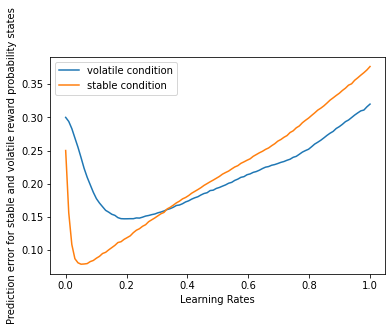

In [23]:
plt.plot(alphas,avgs)
plt.plot(alphas,avgs_stable)
plt.xlabel('Learning Rates')
plt.ylabel('Prediction error for stable and volatile reward probability states')
plt.legend( ['volatile condition', 'stable condition'])


.. double click this to write your response here



In the stable learning condition, the optimal learning rate is .06 .

I notice that the both the graphs start off with pretty high, yet decreasing, differences for the first ~5 alphas, and the difference starts to increase again once they've reached their optimal learning rate. The results are consistent with what we know about reinforcement learning and the model itself. Under stable conditions, a learning agent does not need to be especially sensitive to changes in its environment, because it has learned that these changes rarely occur. Thus, an optimal learning rate would be very small, because in the cases where a previous trial does not result in a reward, the expectation of reward on a next trial should not vary drastically (this would maintain the alpha*delta term close to zero). However, in a more volatile environment, an agent needs to better adapt to wins and losses to inform the expected probability of reward. For that reason, the learning rate under volitile conditions is higher.

# 2. Choosing and learning in volatile and stable environments

So far, we have presented our reinforcement learning model with just one reward probability that had to be estimated. However, we have completely neglected the second important aspect of RL -- decision making. This is why we will start modeling a task that was published by Behrens and colleagues in 2007.

In this task, participants had to choose between two options, a blue and a green one. They had to base their choice on two attributes, how likely each option is to lead to a reward and how high the reward would be. The size of the reward is displayed as a number on top of the option. The probability of a reward had to be learned through experience:

![task figure](task.png)

There were two distinct phases in the experiment, for the first 100 trials of the experiment (‘stable’ block) the probability of a reward was stable, and in the next 100 trials the probabilities were volatile. Importantly, on each trial one of the two options would provide  reward and the other would not, so that only one reward probability (e.g., the reward probability of the blue option) needed to be estimated. In the stable block, the reward probability for the blue option was 75%, meaning that if participants picked the blue option, they would get a reward 15 out of 20 times and if they picked the green option, they would get reward 5 out of 20 times. In the volatile block, the reward probability of the blue option switched between 80% and 20% every 25 trials (just like in section 1 above). Here is a plot of the reward probabilities for the two options across the entire experiment:



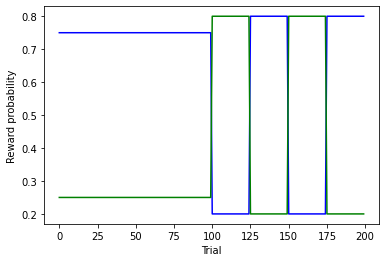

In [24]:
trueProbability = np.concatenate((np.ones(100) * 0.75, np.ones(25) * 0.20, np.ones(25) * 0.8, np.ones(25) * 0.20, np.ones(25) * 0.8))
prob_green = 1 - trueProbability

fig, ax = plt.subplots()
plt.plot(trueProbability, 'b')
plt.plot(prob_green, 'g')
ax.set_xlabel('Trial')
ax.set_ylabel('Reward probability');

In [26]:
# run this code after uploading rewMag.csv (you might have to change the filepath)
rewardMagnitudes = pd.read_csv('rewMag.csv')
reward_mags = rewardMagnitudes.values # converting to array to make life easier
rewardMagnitudes.head()

,blue,green
0,27,15
1,78,85
2,64,29
3,73,91
4,90,12



Note that the participant only needs to learn one reward probability (we are going to assume this is for the blue option), because exactly one option gets rewarded in any given trial, and participants are told on each trial which option was rewarded. In other words, the reward probabilities for the two options are inverse to each other ($P(\text{blue}) = 1 – P(\text{green})$), as you can see in the plot above.

The amount of reward for each option were drawn randomly from a uniform distribution (remember?) between 0 and 100, were shown explicitly on each trial (see above), and were completely independent of the reward probabilities.

Let’s first simulate the estimation of reward probabilities in this experiment using our code from the previous section.


<font color="508C46"><strong>Question 2.1 (2 points)</strong> <br>
 Run the reinforcement-learning model from Question 1.3 on these reward probabilities. Do this twice, once with the optimal learning rate from the volatile condition estimated in Question 1.5, and once with the optimal learning rate from the stable condition estimated in Question 1.4. **Plot estimated reward probabilities for both agents across the 200 trials together with the `trueProbability`. How can you <i>see</i> which learning rate works best in which block?**</font>

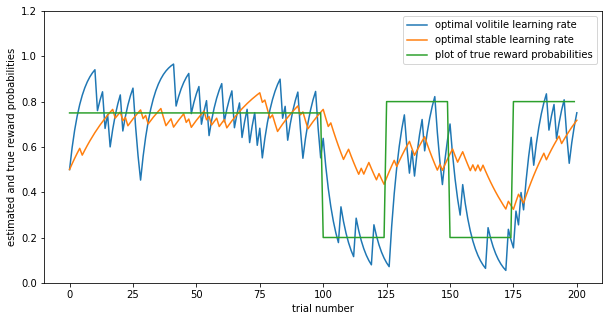

In [27]:
# your code here
#difference = np.zeros((len(alphas), 1000))
plt.figure(figsize=(10,5))
v= RL_function_volatility(trueProbability, learningrate_volatile)
v_stable= RL_function_volatility(trueProbability, learningrate_stable)
     
plt.plot(v)
plt.plot(v_stable)
plt.plot(trueProbability)
plt.ylim(0,1.2)
plt.xlabel('trial number')
plt.ylabel('estimated and true reward probabilities')
plt.legend(['optimal volitile learning rate', 'optimal stable learning rate','plot of true reward probabilities'])


.. double click this to write your response here

You can tell which learning rate works best by seeing which curve (orange or blue) is closest to the green one. When the truprobability is .75 for some time, we see that the orange learning rate is consistently very close to the green curve (after some trials), reflecting that it truly does optimize the model when probabilities are stable. However, when the probabilities in the true probabilitie vector change (when the green goes down for some time and then back up again, etc.), we see that the optimal volatile learning ratr much better accounds for it


Great! So, it looks like we don’t need to do much to alter our old code in order to model reinforcement learning on the new task. However, that by itself is not sufficient for a computational model to perform this task. What we need is a way for the model to compute each option’s *utility*, or how good they are. In doing so, the model should take into account the estimate reward probabilities and the number of points associated with each option. We are going to assume that the participants are doing this appropriately by calculating their expected utility, or the product of the probability of obtaining a reward and the size of that reward:

$ \text{Utility}(\text{option}) = P(\text{option}) \times \text{Reward}(\text{option})$


Let’s practice calculating this by hand.
On a certain trial, a participant estimates that the probability of reward for the blue option is 0.42. They are presented with these options:

![question](question.png)

What is the expected utility of the blue option? What is the expected utility of the green option? Try this out by yourself, and then check your answer in the answer:

Answer (click the arrow to see): <details>
$U(blue)=0.42\times68=28.56,U(green)=(1−0.42)\times51=0.58\times51=29.58$
</details>

Now, that we have a way to give each option a utility for every trial, we need to translate these values into a choice. Of course, it would generally be best if the model prefers the option with the highest utility, because it is trying to maximize future cumulative reward. This could be our rule: always pick the option with the highest expected utility. This rule is known as ‘hard max’ (hard maximization), and this makes choices *deterministically* related to the expected utilities. However, humans are prone to sometimes make mistakes, or to explore non-optimal options (even though here that does not make sense, why?). That’s why we are going to implement a decision rule that translate values into choices in a *stochastic* (probabilistic) way using the following formula:

$P(\text{option}) = \frac{e^{\beta \text{Utility}(\text{option})}}{e^{\beta  \text{Utility}(\text{blue})}+e^{\beta \text{Utility}(\text{green})}}$

As we discussed in class, this decision rule is called *softmax*, and it has a parameter $\beta$ also called the ‘inverse temperature’. This parameter dictates how noisy the choice is: the higher the inverse temperature is, the less stochastic choice becomes. We showed you the following figure in class, this shows how the inverse temperature affects choice probabilities in the softmax rules. As you will see, for all curves, the probability that the agent chooses the green option $P(\text{green})$ increases when the difference in utility on the x-axis $(U(\text{green}) − U(\text{blue}))$
 increases:

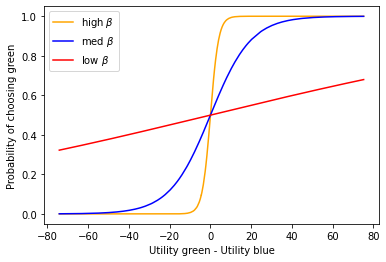

In [28]:
med_beta = 0.1
low_beta = 0.01
high_beta = 0.5
# generate a utility green and utility blue such that the difference between them ranges from -1 to 1 
# and we get a nice sigmoid
utilities_diff = pd.DataFrame()
utility_green = rewardMagnitudes['green'] * (1 - trueProbability)
utility_blue = rewardMagnitudes['blue'] * trueProbability
utilities_diff['utility_diff'] = utility_green - utility_blue


softmax = lambda beta: np.exp(beta*utility_green)/(np.exp(beta*utility_green) + np.exp(beta*utility_blue))
utilities_diff['p_green'] = softmax(med_beta)
utilities_diff.sort_values(by='utility_diff', inplace=True)
fig, ax = plt.subplots()
utilities_diff['p_green'] = softmax(high_beta)
ax.plot(utilities_diff['utility_diff'], utilities_diff['p_green'],color='orange', label=r'high $\beta$')
utilities_diff['p_green'] = softmax(med_beta)
ax.plot(utilities_diff['utility_diff'], utilities_diff['p_green'],color='blue', label=r'med $\beta$')
utilities_diff['p_green'] = softmax(low_beta)
ax.plot(utilities_diff['utility_diff'], utilities_diff['p_green'],color='red', label=r'low $\beta$')
ax.set_xlabel('Utility green - Utility blue')
ax.set_ylabel('Probability of choosing green')
ax.legend();

Note that the agent becomes less stochastic (less exploratory) when the inverse temperature becomes higher.

Let’s test this out on the values you calculated in Question 2.2.



<font color="508C46"><strong>Question 2.2 (2 points)</strong> <br>
 Put the two expected utility values calculated above in a vector called U (hint `U = np.array([value_blue,value_green])`). Let’s set the inverse temperature parameter to beta=0.5. Use the following code to implement the softmax formula above:
 
 ```python
 p_blue = np.exp(beta*U[0]) / np.sum(np.exp(beta*U))
 ```
<font color="508C46">**What is the probability of selecting the blue option? What is the probability of selecting the green option? How do you know? Let’s increase the inverse temperature to $\beta=3$. What are the probabilities for blue and green now? What does this mean?**

 </font>

In [29]:
# your code here
beta=.5
beta_=3

U = np.array([28.56,29.58])
p_blue = np.exp(beta*U[0]) / np.sum(np.exp(beta*U))
p_green=1-p_blue


p_blue_ = np.exp(beta_*U[0]) / np.sum(np.exp(beta_*U))
p_green_=1-p_blue_
print('blue probability: '+ str(p_blue), 'green probability: ' +str(p_green)+ ' beta= .5')
print('blue probability: '+ str(p_blue_), 'green probability: ' +str(p_green_)+ ' beta=3')

blue probability: 0.3751935255315707 green probability: 0.6248064744684293 beta= .5
blue probability: 0.04478770304978663 green probability: 0.9552122969502134 beta=3


... double click this to enter your answer

The probability of picking the blue option is .38 and the probability of picking the green option is .62 when beta is .5. These probabilities change when beta is increased to 3 to .04 for the blue and .96 for green. I calculated this by using the P(option) formula given above and my calculations of expected utility. This shows that increasing the inverse temperature produces a less exploratory and less stochastic model. That is, the model will always choose the the option with the higher reward utility.



We now have all the parts we need to simulate decision making and learning on this task. There’s a bunch of moving parts, so we are setting you up with most of the code for this task. Of course, you will still have to write some lines of code.



In [30]:
def behrens_simulation(rewardProbabilities, reward_mags, alpha, beta):
    """
    Simulate the behrens model
    Inputs:
        rewardProbabilities: a vector of reward probabilities for the blue option
        reward_mags: a matrix of reward magnitudes for the blue and green option
        alpha: learning rate
        beta: softmax inverse temperature
    Outputs:
        dictionary with the following keys:
            P: estimated probability of reward for the blue option
            reward: reward obtained
            opt1Chosen: action chosen, 1 == blue, 0 == green    
    """
    ## simple housekeeping for vectors
    nrtrials = len(rewardProbabilities)

    # initialize variables
    P = np.zeros(nrtrials+1) # estimated probabilities of reward for blue
    reward = np.zeros(nrtrials) # rewards obtained
    opt1Chosen = np.zeros(nrtrials) # actions chosen, 1 == blue, 0 == green

    P[0] = 0.5

    for t in range(nrtrials): # main part of function
        U = reward_mags[t,:] * np.array([P[t], 1-P[t]]) # expected utility calculation

        # implement the softmax choice rule for choosing blue
        p_opt1 =  np.exp(beta*U[0]) / np.sum(np.exp(beta*U))# probability of choosing blue

        opt1Chosen[t] = int(p_opt1>1-p_opt1) # 1== blue chosen, 0 == green chosen
        
        # determine whether blue or green was rewarded
        rewardedOption = int(np.random.rand()<rewardProbabilities[t]) # 1 == blue rewarded, 0 == green rewarded

        # think about when reward is given!
        reward[t] = int(opt1Chosen[t]==rewardedOption)

        # prediction error
        

        # use this to update the probability of reward for blue
        #delta = # your code here
        delta=rewardedOption-P[t]
        # update
        P[t+1] = P[t]+ alpha*delta

    output = {'P': P, 'reward': reward, 'opt1Chosen': opt1Chosen}

    return output


<font color="508C46"><strong>Question 2.3 (8 points)</strong> <br>
Complete the `behrens_simulation` function.
</font>

<font color="508C46"><strong>Question 2.4 (3 points)</strong> <br>
Run the simulation using $\alpha = 0.2$ and $\beta = 2$ and store the output in a variable (I suggest calling it output). Let’s look at the behavior! We can plot choices in the experiment over trials by running `plt.scatter(1:200, output['opt1Chosen'])`. Do you notice a pattern? It should become clearer when you also add the `trueProbability` in this plot. To do so, you can just run `plt.plot(1:200, trueProbability)`. **Describe what you see. What happens when you lower the inverse temperature beta (say to 0.01)? Explain.**
 </font>

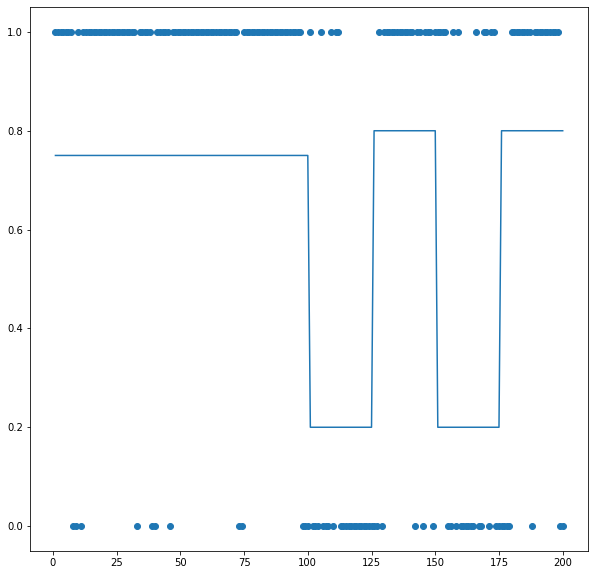

In [31]:
# your code here
output=behrens_simulation(trueProbability, reward_mags, .2, 2)
output
x= np.linspace(1,200, num=200)
plt.figure(figsize=(10,10))
plt.scatter(x,output['opt1Chosen'])
plt.plot(x, trueProbability)


.. double click this to write your response.

In the graph we see when the true prbability of the reward being blue is high, the model is likely to choose blue. We see this because there is a higher concentration of points at 1 which corresponds to picking blue. Of course, because of softmax, we do see instances in the model choosing green (which is shown by the points at zero on the graph). The converse is also true when the probability of the reward being blue is low, meaning that the reward was likely green, the model is more likely to choose green, though it will not do so every time. 

When beta is lower, the model chooses wrong more of the time. We see concentrations of green choices when the more optimal choice would have been blue more often than when beta was higher

<font color="508C46"><strong>Question 2.5 (8 points)</strong><br>
We have established a few times now that in order to get the better estimates of the reward probabilities, you should change the learning rate as a function of the volatility of the reward probabilities. We can now test whether this has an effect on performance in this task. Adapt the code from Question 2.4 so that the code now can have different learning rates for the volatile and stable blocks. Insert your estimates for the optimal learning rates (using `beta=2`) from Questions 1.4 and 1.5 and collect the proportion of rewarded trials for 1000 iterations of the computational model in a vector (you will have to use a `for` loop). So, each element of the vector should contain the proportion of rewarded trials for a single iteration. Repeat this process, but now swap the optimal learning rates (use the optimal volatile learning rate for the stable learning rate and vice versa). **Is there a difference in the average number of rewarded trials between these two agents? Make a figure to support your conclusion. (Hint: by using `plt.hist()`, and `plt.hist()` again, you can get two histograms in a single plot to compare distributions. It would be good to give these two histograms a different color, so we can easily see the difference.) What do you conclude?**
</font>

In [32]:
#new function that takes in alpha as a vector
def behrens_simulation_2(rewardProbabilities, reward_mags, alpha_vector, beta):
    nrtrials = len(rewardProbabilities)
  #length of alphas needs to be the same as length of reward probs

    # initialize variables
    P = np.zeros(nrtrials+1) # estimated probabilities of reward for blue
    reward = np.zeros(nrtrials) # rewards obtained
    opt1Chosen = np.zeros(nrtrials) # actions chosen, 1 == blue, 0 == green
    P[0] = 0.5

    for t in range(nrtrials): # main part of function
        U = reward_mags[t,:] * np.array([P[t], 1-P[t]])
        p_opt1 =  np.exp(beta*U[0]) / np.sum(np.exp(beta*U))# probability of choosing blue
        opt1Chosen[t] = int(p_opt1>1-p_opt1) # 1== blue chosen, 0 == green chosen
        
        # determine whether blue or green was rewarded
        rewardedOption = int(np.random.rand()<rewardProbabilities[t]) # 1 == blue rewarded, 0 == green rewarded

        # think about when reward is given!
        reward[t] = int(opt1Chosen[t]==rewardedOption)
        delta=rewardedOption-P[t]
        # update
        P[t+1] = P[t]+ alpha_vector[t]*delta #change where takes in alpha[t]

    output = {'P': P, 'reward': reward, 'opt1Chosen': opt1Chosen}

    return output

In [33]:
from pandas.io import json
alphas_ =  np.concatenate((np.ones(100) * learningrate_stable, np.ones(25) * learningrate_volatile, np.ones(25) * learningrate_volatile, np.ones(25) * learningrate_volatile, np.ones(25) * learningrate_volatile))
#alphas in the order of each block for true probability ^^
reward=np.zeros(1000)
for j in range(1000):
    function= behrens_simulation_2(trueProbability, reward_mags, alphas_, 2)
    reward[j]= np.average(function['reward'])
#swapped learning rate
alphas_swap=  np.concatenate((np.ones(100) * learningrate_volatile, np.ones(25) * learningrate_stable, np.ones(25) * learningrate_stable, np.ones(25) * learningrate_stable, np.ones(25) * learningrate_stable))
reward_swapped=np.zeros(1000)
for j in range(1000):
    function2= behrens_simulation_2(trueProbability, reward_mags, alphas_swap, 2)
    reward_swapped[j]= np.average(function2['reward'])

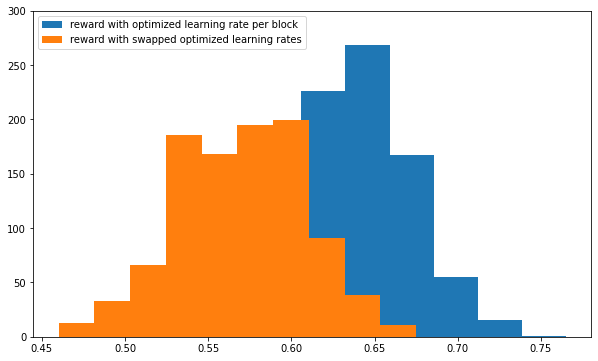

In [34]:
plt.figure(figsize=(10,6))
plt.hist(reward)
plt.hist(reward_swapped)
plt.ylim(0,300)
plt.legend(['reward with optimized learning rate per block', 'reward with swapped optimized learning rates'])


.. double click this to write your response

The blue graph representing agents using optimized learning rates per block has the higher proportion of reward received (where proportion is on the x axis and frequency is on the y axis). We can see this because its distribution is shifted to the right of the orange graph, meaning that the proportion of rewards using swapped alphas was lower.I conclude that using alphas that correspond to the reward probability blocks produce the most number of rewards and that thus learning rate, and the ability to adjust it according to the encironment, impacts successful decision making

# 3. Choosing and learning in volatile and stable environments

You now know that it’s optimal to change the learning rate as a function of the volatility of the reward probabilities in this task. However, we do not yet know whether humans that are performing this task change their learning rate based on the volatility of the reward distributions.

We can only answer this question by analyzing data from people who are actually performing this task. It turns out we have some of that data!

You’ll see that the data folder contains a csv called `subject_data.csv` with data for sixteen subjects that completed this task. We are going to use this function to fit the model’s parameters (the learning rate $\alpha$ and the inverse temperature $\beta$) to the data for each participant separately.

But before we do this, let’s again make sure you understand what the data file looks like. For example, in the next cell, load up all the data for subject 1. What are the fields of the variable `data`? A lot of them should look familiar! What does the field `'stableBlock'` contain? How do you know?

Also, familiar yourself again with pulling out one particular subject's data file. How do you get all trials from subject 1?

In [35]:

# load the datafile here
data= pd.read_csv('subject_data.csv')
sub1_data=data.loc[data['subnr']==1]
sub1_data

,trial,opt1Chosen,blueRewarded,reactionTime,chosenOptionRewarded,stableBlock,pointsWon,trueProbability,subnr,blueReward,greenReward
0,0,1,1,52.772837,1,1,27,0.75,1,27,15
1,1,1,1,5.115856,1,1,78,0.75,1,78,85
2,2,1,1,2.004801,1,1,64,0.75,1,64,29
3,3,0,1,1.006774,0,1,0,0.75,1,73,91
4,4,1,1,2.773869,1,1,90,0.75,1,90,12
...,...,...,...,...,...,...,...,...,...,...,...
195,195,1,0,3.688654,0,0,0,0.80,1,75,57
196,196,1,0,3.428738,0,0,0,0.80,1,50,58
197,197,1,1,0.611998,1,0,62,0.80,1,62,2
198,198,1,1,1.126312,1,0,32,0.80,1,32,94


Make sure you understand all fields, and make sure you know how to index this dataframe so that you can get one participant's data.

Now that we have participants’ choices, the outcomes on each trial for each, and a way to translate these in the choice *likelihoods*, we can (you guessed it) start fitting the free parameters in the model using maximum likelihood estimation.

The logic will be the same as the first lab’s assignments. You are going to adapt some Python code that translates the choices and parameter values into the sum of loglikelihoods across all trials. Then, we will use the optimizer function `minimize` to find the parameter values that minimize the negative sum of loglikelihoods (i.e., to *maximize* the sum of loglikelihoods) given the data. As you will recall, we will do this to find the parameter values that maximizes the fit between the model and the data.

Great. Now, we can start writing our loglikelihood function! Remember, we want to be able to provide this function with a participant’s data, and some parameter values, and then we want it to return the sum of the loglikelihoods for all the trials.

We are again providing you with some code to set you up in `volatility_3params_loglik` Most of the steps should be familiar to you by now, but there are a few things to note. First of all, recall that we want to investigate whether people change their learning rate based on the volatility of the rewards. That is why we are going to fit a learning rate separately for the stable block and for the volatile block.

We are also going to store the likelihood of each trial in a variable called `lik`, which will then be log transformed and added to a tally of loglikelihoods `LL`. You will have to adopt some code from the simulation functions in order to store the appropriate likelihood (which depend on the choice!).

You will also have to complete the code in lines 34 and 37, but you’ve done this a few times now, so that shouldn’t be too big of an issue.

After collecting all the fitted values, we will then use inferential statistics (e.g., there are t-tests in SciPy) to figure out whether there is a significant difference between them (and to test whether any effect goes in the predicted *direction*).

In [36]:
def volatility_loglik_3params(subdata, alpha_stable, alpha_volatile, beta):
    nrtrials = len(subdata['trueProbability'])

    # initialize variables
    P = np.zeros(nrtrials+1) # estimated probabilities of reward for blue
    P[0] = 0.5

    LL = 0
    trial=subdata['trial'].values
    # complete the code below
    for t, trial in enumerate(trial):
      subdata_=subdata.loc[subdata['trial']==t]
        # here you need to check if the block is stable or volatile to use the appropriate learning rate
      if subdata_['stableBlock'].values[0] == 1:
        alpha = alpha_stable
      else:
        alpha = alpha_volatile
        
        # calculate the expected values U = reward_mags[t,:] * np.array([P[t], 1-P[t]])
      U =  np.array([P[t]*subdata_['blueReward'].values[0], (1-P[t])*subdata_['greenReward'].values[0]])
    
        # here you want to calculate the likelihood of the chosen option
      if subdata_['opt1Chosen'].values[0]==1:
        lik = np.exp(beta*U[0]) / np.sum(np.exp(beta*U))
      else:
        lik = np.exp(beta*U[1]) / np.sum(np.exp(beta*U))

    #     # prediction error
      delta= subdata_['blueRewarded'].values[0]-P[t]
     
    #     # update
      P[t+1] = P[t]+delta*alpha

      LL = LL+(np.log(lik))

    return LL


<font color="508C46"><strong>Question 3.1 (10 points)</strong><br>
Complete `volatility_loglik_3params()`
<font>

In [42]:
# test your code here
volatility_loglik_3params(sub1_data, .02,.2,2)


-2489.561386911259

<font color="508C46"><strong>Question 3.2 (10 points)</strong><br>
Write a function that find the best fitting parameter values for $\alpha_{stable}$, $\alpha_{volatile}$, and $\beta$ for this 3-parameter reinforcement learning model using Maximum Likelihood Estimation. The learning rates should be bound between 0 and 1. The lower bound for the inverse temperature should be 0, and even though it theoretically does not have an upper bound, we can practically set it 5 to speed things up. There appears to be a local minimum for some participants. You can avoid this by fitting each participants 10 times with random starting points, and then selecting the best out of those fits. Alternatively (and less elegantly), you can just set `x0 = [0.1, 0.1, 0.1]`. **Report your findings. What are the average values for the learning rates in the stable and volatile blocks? What is the average inverse temperature? Is there a significant difference between the learning rates for the volatile and stable blocks? Interpret the results. What does this mean for your understanding of learning and decision making?**
<font>

In [39]:
# your code here
def best_params_RLmodel():
  bounds=[(0,1),(0,1),(0,5)]
  x0 = (0.1, 0.1, 0.1)
  params={}
  data= pd.read_csv('subject_data.csv')
  participants=np.unique(data['subnr'].values)
  for i, participant in enumerate(participants):
    subdata=data.loc[data['subnr']==participant]
    function_handle= lambda x: -volatility_loglik_3params(subdata, x[0],x[1],x[2])
    res=minimize(function_handle, x0=x0, bounds=bounds)
    params[participant]={'negloglik':res.fun, 'alpha_stable':res.x[0], 'alpha_volatile':res.x[1],'beta':res.x[2] }
  return params


In [40]:
result=best_params_RLmodel()
result

{1: {'negloglik': 84.82515882866983,
  'alpha_stable': 0.024218704185589926,
  'alpha_volatile': 0.0,
  'beta': 0.08231186487414877},
 2: {'negloglik': 118.08057752886013,
  'alpha_stable': 0.05816265349957845,
  'alpha_volatile': 0.09711111789293249,
  'beta': 0.03965351983778355},
 3: {'negloglik': 92.89500529181142,
  'alpha_stable': 0.0,
  'alpha_volatile': 0.005546027253812453,
  'beta': 0.09449342353957318},
 4: {'negloglik': 99.97345803354361,
  'alpha_stable': 0.06198289660069528,
  'alpha_volatile': 0.0019874689992166127,
  'beta': 0.058222882208396734},
 5: {'negloglik': 95.61650341047189,
  'alpha_stable': 0.07942871234421485,
  'alpha_volatile': 0.1824436930523523,
  'beta': 0.06476378361807306},
 6: {'negloglik': 100.9657636324975,
  'alpha_stable': 0.05190821609938951,
  'alpha_volatile': 0.4035178546885796,
  'beta': 0.05059219944211819},
 7: {'negloglik': 97.35029006468561,
  'alpha_stable': 0.0007295025136022837,
  'alpha_volatile': 0.0037002716152442243,
  'beta': 0.0

In [47]:

avg_stable=0
avg_vol=0
avg_beta=0
stable=np.zeros(16)
vol=np.zeros(16)
for i in range(1,17):
  avg_stable = avg_stable + result[i]['alpha_stable']
  stable[i-1]=result[i]['alpha_stable']
  avg_vol = avg_vol + result[i]['alpha_volatile']
  avg_beta = avg_beta + result[i]['beta']
  vol[i-1]=result[i]['alpha_volatile']

avg_stable = avg_stable/16
avg_vol = avg_vol/16
avg_beta = avg_beta/16

print('stable: '+str(avg_stable),'volatile: ' +str(avg_vol), 'beta: '+str(avg_beta ))
stats.ttest_ind(stable, vol)

stable: 0.04602758577942295 volatile: 0.10389837758229131 beta: 0.07451919846312835


Ttest_indResult(statistic=-2.022135254468665, pvalue=0.05215842395106652)


.. double click this to type your response.

The average optimal alpha for the stable blocks is .046. The average optimal alpha for the volatile blocks is .104. The average inverse temperature is .07 (surprising). At an alpha of .1, stable learning rates and volitile learning rates are significantly different. However since p is slightly greater than .05, they are not significantly different at an alpha of .05. This confirms that under stable reward probabilities, learning rate is lower and that this contributes to their decision making. Further, it shows that learning rate is updated under volatile environments in order to optimize the probability of reward under conditions that fluctuate more often. Reinforcement learning thus plays a role in decision making, because the probability of choosing an option is informed by whether the past choice was rewarded or not. The utility metric is used in the softmax calculation of probability of choosing a certain option, and is upated with respect to reward expectation. 